In [902]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# This is used in order to show the plotted figures within this notebook
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PowerTransformer, Binarizer


In [903]:
dev = pd.read_csv('output/loan_dev.csv')
comp = pd.read_csv('output/loan_comp.csv')
all = pd.read_csv('output/loan.csv')

list(dev.columns)


['Id',
 'loan_date',
 'loan_duration',
 'loan_payments',
 'Predicted',
 'account_frequency',
 'account_district_region',
 'account_district_no_inhabitants',
 'account_district_no_municipalities_0_499',
 'account_district_no_municipalities_500_1999',
 'account_district_no_municipalities_2000_9999',
 'account_district_no_municipalities_10000_plus',
 'account_district_no_cities',
 'account_district_ratio_urban_inhabitants',
 'account_district_average_salary',
 'account_district_unemployment_rate_95',
 'account_district_unemployment_rate_96',
 'account_district_no_enterpreneurs_per_1000_inhabitants',
 'account_district_no_crimes_95',
 'account_district_no_crimes_96',
 'owner_card_type',
 'owner_district_region',
 'owner_district_no_inhabitants',
 'owner_district_no_municipalities_0_499',
 'owner_district_no_municipalities_500_1999',
 'owner_district_no_municipalities_2000_9999',
 'owner_district_no_municipalities_10000_plus',
 'owner_district_no_cities',
 'owner_district_ratio_urban_inhabi

# Transformation Utils

In [904]:
def show_hist(column, trend=True):
    sns.histplot(dev[column], kde=trend)
    plt.show()

def transform(columns, scaler):
    scaler = scaler.fit(dev[columns])
    dev[columns] = scaler.transform(dev[columns])
    comp[columns] = scaler.transform(comp[columns])
    all[columns] = scaler.transform(all[columns])

def transform_and_compare(show_transform, scaler, plot=None, trend=True):
    for show, trans in show_transform.items():
        if plot is None:
            transform(trans, scaler)
            continue
        fig, ax = plt.subplots(1, 2, constrained_layout=True)
        plot(dev[show], ax=ax[0])
        transform(trans, scaler)
        plot(dev[show], ax=ax[1])
        fig.show()

def account_owner_cols(attribute):
    return ['account' + attribute, 'owner' + attribute]

# Account & Owner
#### (most dists are exactly the same)

In [905]:
[col for col in dev if col.startswith('account') or col.startswith('owner')]


['account_frequency',
 'account_district_region',
 'account_district_no_inhabitants',
 'account_district_no_municipalities_0_499',
 'account_district_no_municipalities_500_1999',
 'account_district_no_municipalities_2000_9999',
 'account_district_no_municipalities_10000_plus',
 'account_district_no_cities',
 'account_district_ratio_urban_inhabitants',
 'account_district_average_salary',
 'account_district_unemployment_rate_95',
 'account_district_unemployment_rate_96',
 'account_district_no_enterpreneurs_per_1000_inhabitants',
 'account_district_no_crimes_95',
 'account_district_no_crimes_96',
 'owner_card_type',
 'owner_district_region',
 'owner_district_no_inhabitants',
 'owner_district_no_municipalities_0_499',
 'owner_district_no_municipalities_500_1999',
 'owner_district_no_municipalities_2000_9999',
 'owner_district_no_municipalities_10000_plus',
 'owner_district_no_cities',
 'owner_district_ratio_urban_inhabitants',
 'owner_district_average_salary',
 'owner_district_unemployment

/home/baltazar/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/baltazar/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


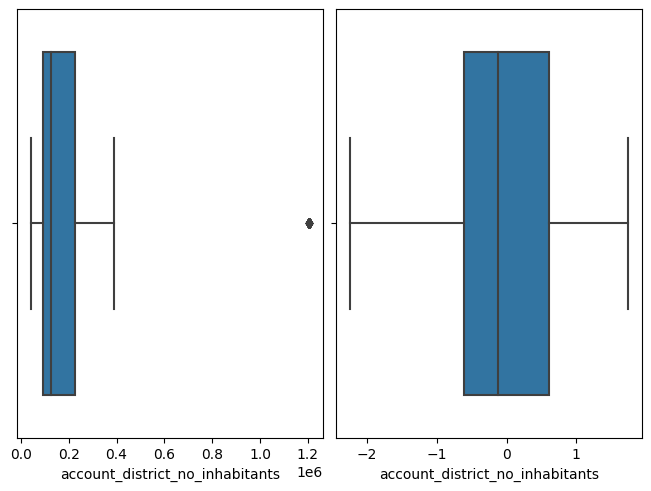

In [906]:
log_attrs = ['_district_no_inhabitants']

show_transform = {'account' + attr : account_owner_cols(attr) for attr in log_attrs}

transform_and_compare(show_transform, PowerTransformer(), plot=sns.boxplot)

In [907]:
norm_attrs = ['_district_no_municipalities_0_499',
              '_district_no_municipalities_500_1999', '_district_no_municipalities_2000_9999', '_district_no_cities', '_district_ratio_urban_inhabitants', '_district_average_salary',
              '_district_unemployment_rate_95', '_district_unemployment_rate_96', '_district_no_enterpreneurs_per_1000_inhabitants', '_district_no_crimes_95', '_district_no_crimes_96']

show_transform = {'account' + attr : account_owner_cols(attr) for attr in norm_attrs}
# '_age_months' only occurs on account
show_transform['account_age_months'] = ['account_age_months']
# '_age' only occurs on owner
show_transform['owner_age'] = ['owner_age']

transform_and_compare(show_transform, StandardScaler())

# Transactions

In [908]:
trans_cols = ['loan_payments',
              'count_trans_credits',
              'count_trans_withdrawals',
              'count_trans_credit_cash',
              'count_trans_withdrawal_cash',
              'count_trans_withdrawal_card',
              'count_trans_collection_other_bank',
              'count_trans_remittance_other_bank',
              'count_trans_ksymbol_interest_credited',
              'count_trans_ksymbol_household',
              'count_trans_ksymbol_payment_for_statement',
              'count_trans_ksymbol_sanction_interest_if_negative_balance',
              'last_trans_balance',
              'mean_trans_balance',
              'mean_trans_amount_absolute',
              'mean_trans_amount_credit',
              'mean_trans_amount_withdrawal',
              'mean_trans_amount_signed']


/home/baltazar/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/baltazar/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/baltazar/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. Fr

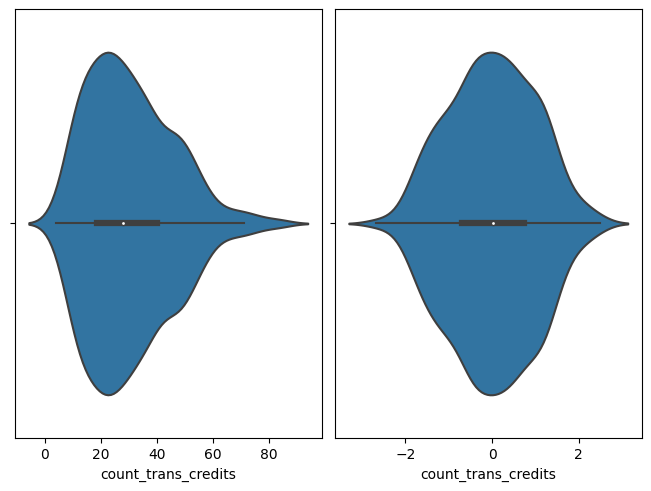

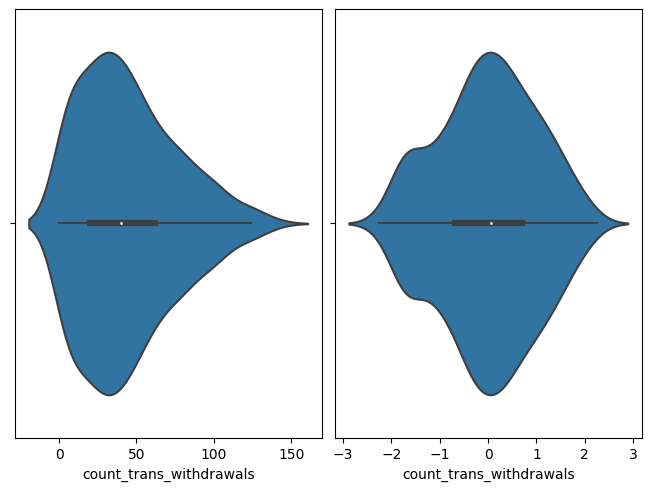

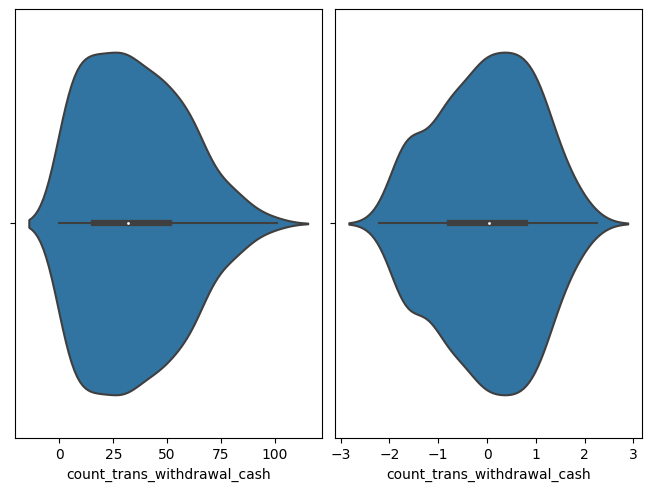

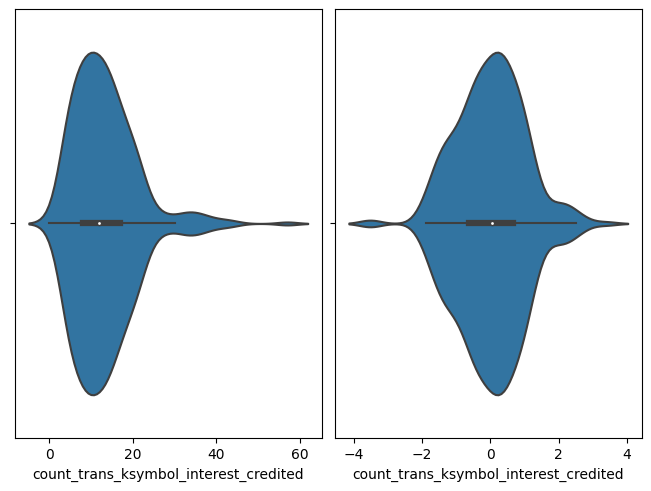

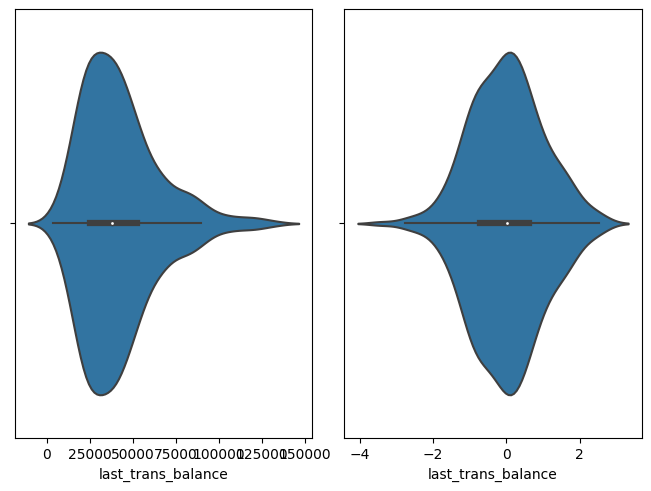

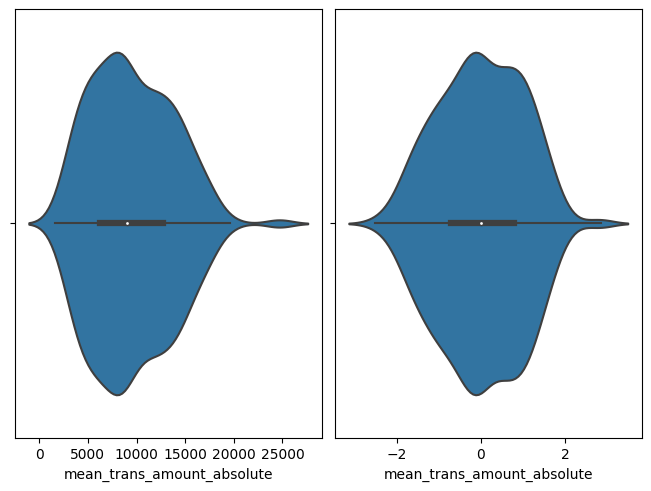

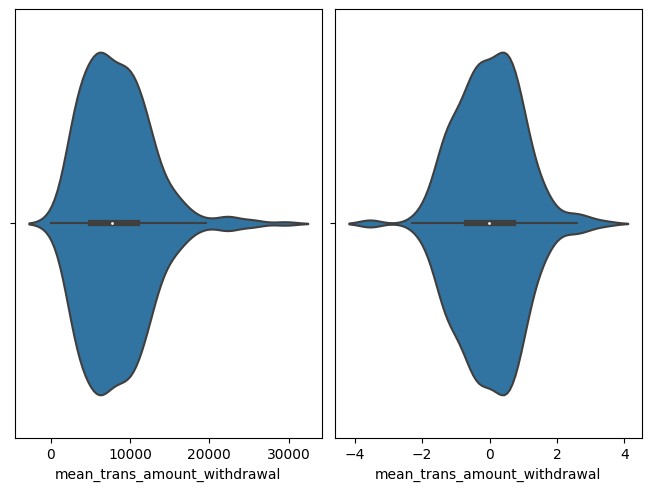

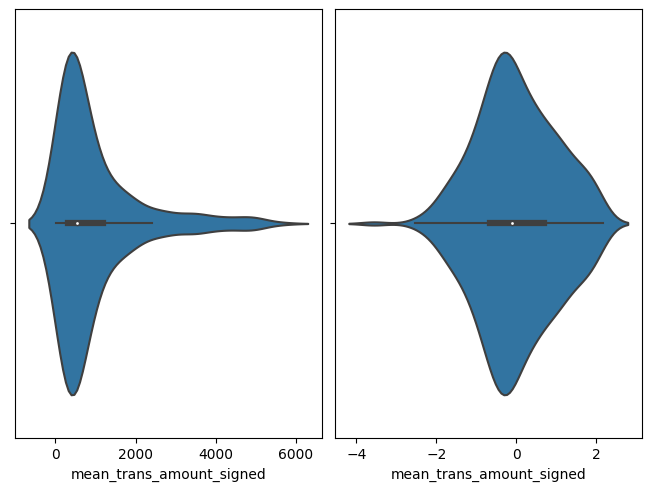

In [909]:
log_cols = ['count_trans_credits',
            'count_trans_withdrawals',
            'count_trans_withdrawal_cash',
            'count_trans_ksymbol_interest_credited',
            'last_trans_balance',
            'mean_trans_amount_absolute',
            'mean_trans_amount_withdrawal',
            'mean_trans_amount_signed']

show_transform = {col: [col] for col in log_cols}

transform_and_compare(show_transform, PowerTransformer(), plot=sns.violinplot)


/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_141558/1805807291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


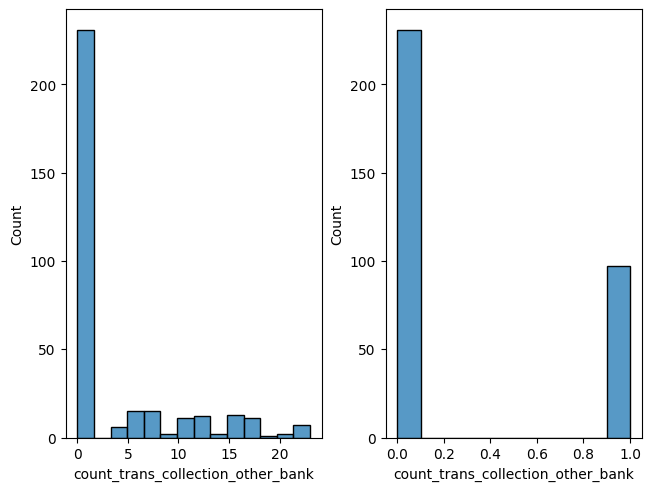

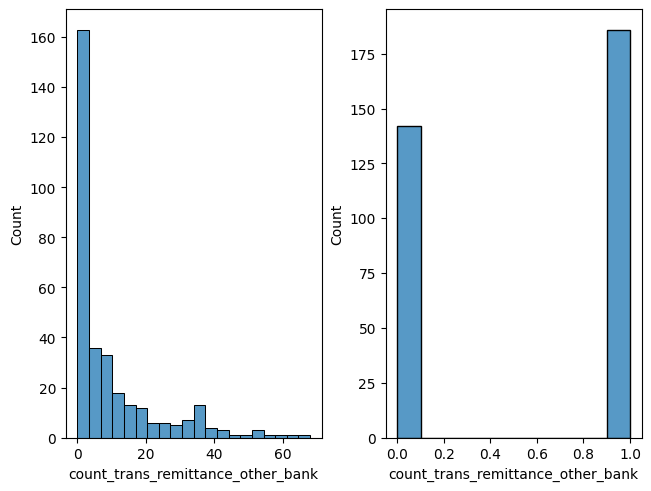

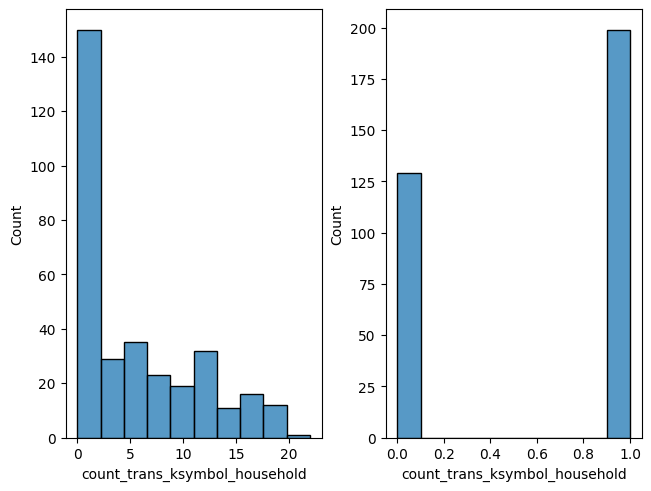

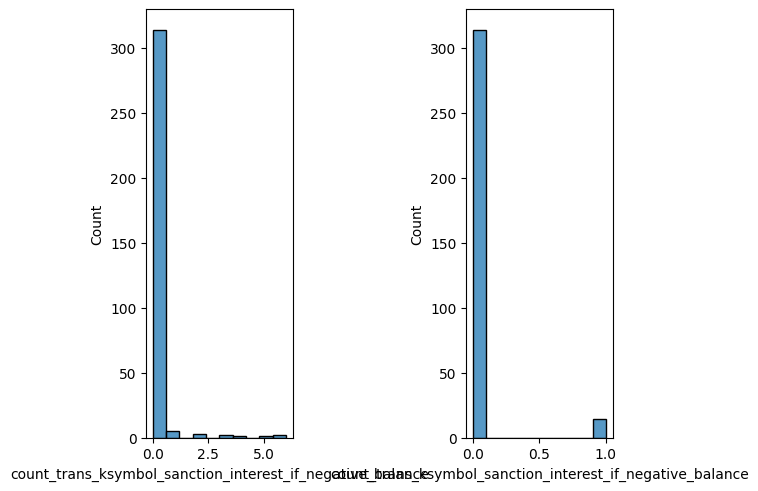

In [910]:
bin_cols = ['count_trans_collection_other_bank',
            'count_trans_remittance_other_bank',
            'count_trans_ksymbol_household',
            'count_trans_ksymbol_sanction_interest_if_negative_balance']

show_transform = {col: [col] for col in bin_cols}

transform_and_compare(show_transform, Binarizer(), sns.histplot)


In [911]:
norm_cols = [col for col in trans_cols if col not in log_cols +
             bin_cols and col != 'count_trans_withdrawal_card']

show_transform = {col: [col] for col in bin_cols}

transform_and_compare(show_transform, StandardScaler())


In [912]:
dev.to_csv('output/loan_dev_transformed.csv', index=False)
comp.to_csv('output/loan_comp_transformed.csv', index=False)
all.to_csv('output/loan_transformed.csv', index=False)